In [10]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [12]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
 print("Number of rows: {df.shape[0]] Number of Columns: (df.shape[1]]")

Number of rows: {df.shape[0]] Number of Columns: (df.shape[1]]


In [14]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'Correlation among the Variables')

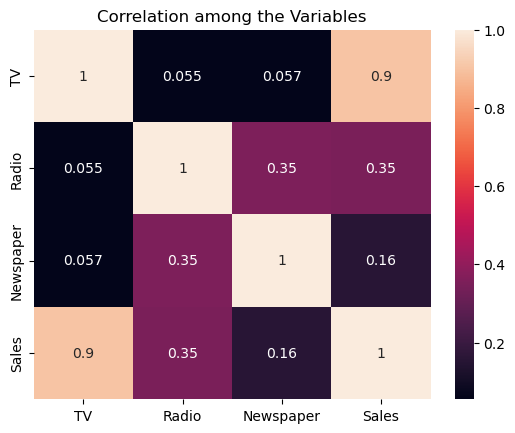

In [15]:
sns.heatmap(df.corr(), annot=True, fmt='.2g')
plt.title('Correlation among the Variables')

Text(0.5, 1.0, 'Distribution of Continuous Variables')

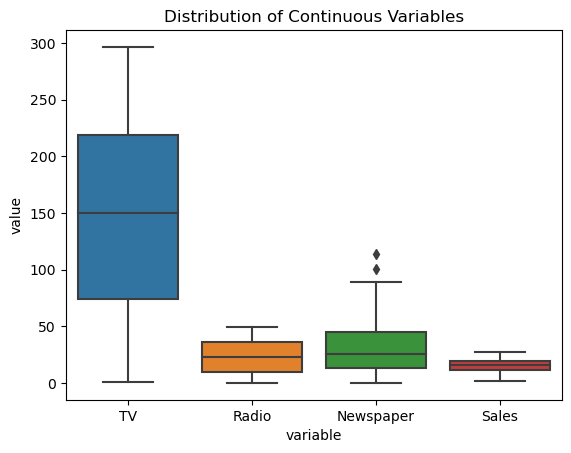

In [16]:
sns.boxplot(df.melt(value_vars=df.columns), x='variable', y='value') 
plt.title('Distribution of Continuous Variables')

Text(0, 0.5, 'Values')

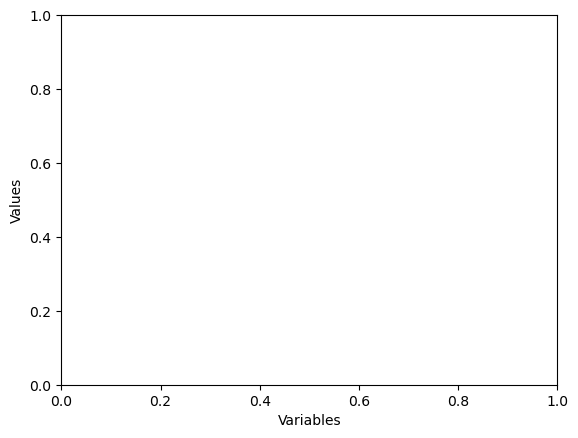

In [18]:
plt.xlabel("Variables")
plt.ylabel('Values')

In [20]:
X=df.drop(['Sales'], axis=1)
y=df['Sales']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print(f'''X train: {X_train.shape}
X test: {X_test.shape}
y train: {y_train.shape}
y test: {y_test.shape}''')

X train: (160, 3)
X test: (40, 3)
y train: (160,)
y test: (40,)


In [23]:
preprocess=Pipeline([('scaler', StandardScaler())])


In [27]:
model=Pipeline([('preprocess', preprocess), ('regressor', RandomForestRegressor())])
model.fit(X_train,y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())])

In [28]:
y_pred = model.predict(X_test)
print(f'Testing Accuracy: round(100*r2_score(y_test, y_pred), 2)) %')

Testing Accuracy: round(100*r2_score(y_test, y_pred), 2)) %


In [31]:
with open('./model.pkl', 'wb') as fp:
 pickle.dump(model,fp)